In [18]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

In [19]:
path = "data/number/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
df_number = pd.DataFrame(columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])

for file in onlyfiles:
    with open(path+file) as f:
        content = f.readlines()
        label = int(content[0])

        strokes = int(content[len(content)-1][11:12]) #How many strokes of the pen
        n_row = 3
        x = []
        y = []
        time_taken   = []

        for _ in range(strokes):
            if n_row < len(content)-3:
                if(content[n_row] == "Pen Down (x,y)\n"):
                    n_row =+ 1
                
                while content[n_row] != 'Pen Up\n' and content[n_row] != '\n': #Take all of the axis
                    xi, yi = content[n_row].split('_')
                    yi = yi[:-1]
                    n_row += 1
                    x.append(float(xi))
                    y.append(float(yi))
                    if n_row >= len(content)-3 :
                        break

                n_row += 1

                if content[n_row][0] == "T": #If there is written "Time_taken"
                    time_taken.append(content[n_row][11:16])
                    n_row += 1
                
                if content[n_row][0] == "T": #There are double "Time_taken" 
                    n_row += 1
        
        speed = content[len(content)-2][7:12]
        

        df_temp = pd.DataFrame([[label,x,y,time_taken, speed, strokes]], columns=['label', 'x', 'y', 'time_taken', 'speed', 'strokes'])
        df_number = pd.concat([df_number, df_temp])


df_number = df_number.drop(columns="time_taken") 

# Drop column time_taken beacuse is not good. It can be fixed
# But it's not so important because we have also the ratio speed that is strokes/seconds

index = pd.Series(np.arange(len(df_number)))
df_number.set_index(index, inplace=True)

In [20]:
# df_number.to_csv("data/number/number.csv", index=False)

In [21]:
# df_number = pd.read_csv("data/number.csv")

train_size = int(0.7*len(df_number))
df_number_train = df_number[:train_size]
df_number_test = df_number[train_size:]

In [22]:
df_number_train[df_number_train['x'].map(lambda d: len(d)) > 0]

for i in range(len(df_number_train)):
    if df_number_train.iloc[i,1] == []:
        df_number_train.iloc[i,1] = np.nan

df_number_train.dropna(subset=['x'], inplace=True)
df_number_train.head()

/tmp/ipykernel_32670/918278402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train.iloc[i,1] = np.nan
/tmp/ipykernel_32670/918278402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train.dropna(subset=['x'], inplace=True)


,label,x,y,speed,strokes
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1


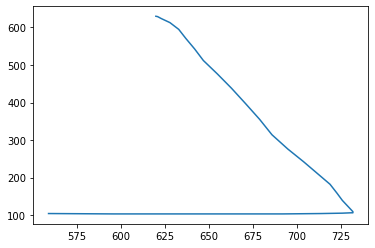

In [23]:
# plt.plot(df_number['x'].iloc[0], df_number['y'].iloc[0])
plt.plot(df_number_train['x'].iloc[11], df_number_train['y'].iloc[11])
# plt.plot(df_number['x'].iloc[2], df_number['y'].iloc[2])
# plt.plot(df_number['x'].iloc[3], df_number['y'].iloc[3])

#Sono al contrario

In [24]:
df_number_train.iloc[11]

label                                                      7
x          [559.0, 596.0, 631.0, 663.0, 692.0, 714.0, 726...
y          [104.0, 103.0, 103.0, 103.0, 103.0, 104.0, 105...
speed                                                  1.684
strokes                                                    1
Name: 12, dtype: object

In [25]:
# Take only a subset of the dataframe
# df_number_train = df_number_train[:10]  #THEN REMOVE

In [26]:
def calculate_angle_of_two_points(x1, y1, x2, y2):
    angle = np.arctan2(y2-y1, x2-x1)
    return angle

# angles = pd.Series(index=df_number_train.index)
angles = []
i = 0

for i in range(len(df_number_train)):
    number = df_number_train.iloc[i]
    vector_of_angles = []
    for p in range(len(number['x'])-1):
        angle = calculate_angle_of_two_points(number['x'][p], number['y'][p], number['x'][p+1], number['y'][p+1])
        angle = round(angle, 2)
        vector_of_angles.append(angle)
    # angles[i] = vector_of_angles
    angles.append(vector_of_angles)


df_number_train['angles'] = angles
df_number_train.head()

/tmp/ipykernel_32670/3064740740.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number_train['angles'] = angles


,label,x,y,speed,strokes,angles
0,5,"[908.0, 925.0, 925.0, 888.0, 832.0, 765.0, 705...","[212.0, 207.0, 206.0, 208.0, 210.0, 210.0, 211...",1.454,1,"[-0.29, -1.57, 3.09, 3.11, 3.14, 3.12, 3.12, 3..."
1,1,"[639.0, 647.0, 649.0, 653.0, 655.0, 657.0, 658...","[133.0, 147.0, 152.0, 176.0, 197.0, 238.0, 268...",1.939,1,"[1.05, 1.19, 1.41, 1.48, 1.52, 1.54, 1.54, 1.4..."
2,3,"[499.0, 550.0, 573.0, 623.0, 674.0, 739.0, 754...","[154.0, 140.0, 137.0, 132.0, 131.0, 140.0, 146...",1.640,1,"[-0.27, -0.13, -0.1, -0.02, 0.14, 0.38, 0.62, ..."
3,2,"[481.0, 508.0, 519.0, 561.0, 578.0, 635.0, 655...","[214.0, 188.0, 178.0, 150.0, 142.0, 127.0, 126...",1.599,1,"[-0.77, -0.74, -0.59, -0.44, -0.26, -0.05, 0.0..."
4,3,"[509.0, 533.0, 576.0, 608.0, 638.0, 665.0, 688...","[39.0, 31.0, 23.0, 20.0, 22.0, 30.0, 45.0, 81....",1.120,1,"[-0.32, -0.18, -0.09, 0.07, 0.29, 0.58, 1.04, ..."


In [44]:
#Divide the dataframe for each label 
# Since we will contruct a HMM for each label

temp = df_number_train.groupby(['label'])
df_classes = {}
# for row in df_number_train:
#     df_classes[row]['label'].append(row)
for name, group in temp:
    df_classes[name] = group
    print("len of class ", name, ": ", len(group))


# See if x and y are only numbers (Se ho sbagliato ad importare da tutti i file txt)
for name, group in df_classes.items():
    for i in range(len(group)):
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['angles']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")
        if type(group.iloc[i]['speed']) != str:
            print("Error in speed")
        if type(group.iloc[i]['strokes']) != int:
            print("Error in strokes")
        if type(group.iloc[i]['angles']) != list:
            print("Error in angles")
        if type(group.iloc[i]['label']) != int:
            print("Error in label")
        if type(group.iloc[i]['x']) != list:
            print("Error in x")
        if type(group.iloc[i]['y']) != list:
            print("Error in y")

#Divide the dataset into the different classes

len of class  0 :  76
len of class  1 :  76
len of class  2 :  87
len of class  3 :  94
len of class  4 :  85
len of class  5 :  103
len of class  6 :  96
len of class  7 :  86
len of class  8 :  84
len of class  9 :  84


Dataset is balanced


## HMM problem and solutions
* Evaluation:
    * Problem - Compute Probabilty of observation sequence given a model
    * Solution - Forward Algorithm and Viterbi Algorithm
* Decoding:
    * Problem - Find state sequence which maximizes probability of observation sequence
    * Solution - Viterbi Algorithm
* Training:
    * Problem - Adjust model parameters to maximize probability of observed sequences
    * Solution - Forward-Backward Algorithm

## Train HMM

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.226.3759&rep=rep1&type=pdf

https://learning.oreilly.com/library/view/python-machine-learning/9781786464477/ch07s08.html#ch07lvl2sec94

### Calculate Gaussian Mixture of model to find observation probability

In [28]:
from sklearn.mixture import GaussianMixture

X0 = df_classes[0][['angles', 'x', 'y']]

# GMM = GaussianMixture(n_components=3, random_state=0).fit(X0) BUGGATO

In [29]:
from hmmlearn import hmm

df_classes[0]


,label,x,y,speed,strokes,angles
5,0,"[668.0, 640.0, 617.0, 578.0, 550.0, 521.0, 491...","[109.0, 108.0, 110.0, 118.0, 128.0, 141.0, 157...",1.136,1,"[-3.11, 3.05, 2.94, 2.8, 2.72, 2.65, 2.51, 2.3..."
48,0,"[604.0, 570.0, 559.0, 532.0, 525.0, 518.0, 519...","[165.0, 226.0, 249.0, 326.0, 352.0, 424.0, 445...",2.559,1,"[2.08, 2.02, 1.91, 1.83, 1.67, 1.52, 1.26, 0.8..."
54,0,"[566.0, 533.0, 510.0, 484.0, 460.0, 438.0, 419...","[72.0, 97.0, 117.0, 141.0, 170.0, 200.0, 232.0...",0.901,1,"[2.49, 2.43, 2.4, 2.26, 2.2, 2.11, 2.07, 1.99,..."
55,0,"[728.0, 714.0, 697.0, 679.0, 660.0, 642.0, 626...","[141.0, 143.0, 145.0, 149.0, 152.0, 157.0, 162...",0.609,1,"[3.0, 3.02, 2.92, 2.98, 2.87, 2.84, 2.76, 2.68..."
60,0,"[675.0, 668.0, 659.0, 649.0, 639.0, 629.0, 618...","[179.0, 182.0, 187.0, 193.0, 200.0, 208.0, 217...",0.783,1,"[2.74, 2.63, 2.6, 2.53, 2.47, 2.46, 2.44, 2.43..."
...,...,...,...,...,...,...
868,0,"[916.0, 924.0, 918.0, 883.0, 845.0, 796.0, 741...","[226.0, 195.0, 188.0, 167.0, 155.0, 148.0, 145...",1.338,1,"[-1.32, -2.28, -2.6, -2.84, -3.0, -3.09, 3.06,..."
870,0,"[764.0, 751.0, 742.0, 730.0, 702.0, 680.0, 657...","[194.0, 190.0, 190.0, 191.0, 199.0, 207.0, 218...",1.333,1,"[-2.84, 3.14, 3.06, 2.86, 2.79, 2.7, 2.48, 2.3..."
872,0,"[541.0, 503.0, 488.0, 442.0, 414.0, 392.0, 384...","[208.0, 230.0, 240.0, 276.0, 304.0, 337.0, 353...",1.882,1,"[2.62, 2.55, 2.48, 2.36, 2.16, 2.03, 1.76, 1.4..."
877,0,"[625.0, 586.0, 559.0, 522.0, 500.0, 481.0, 468...","[140.0, 158.0, 176.0, 208.0, 236.0, 267.0, 300...",1.777,1,"[2.71, 2.55, 2.43, 2.24, 2.12, 1.95, 1.82, 1.6..."


In [30]:

model1 = hmm.GMMHMM(n_components=2, covariance_type="full") #Full?
#or multinomial, in this way, the initial probebilities  are initialized randomly. (?)
# model = hmm.MultinomialHMM(n_components=4)

initial_prob = [[1], [0], [0], [0]]
model.startprob_prior = initial_prob

# X = np.concatenate([df_classes[9]['x'].values, df_classes[9]['y'].values, df_classes[9]['speed'].values, df_classes[9]['strokes'].values])
# length = [len(df_classes[9]['x'].values), len(df_classes[9]['y'].values), len(df_classes[9]['speed'].values), len(df_classes[9]['strokes'].values)]

# X = np.concatenate([df_classes[9]['x'].values, df_classes[9]['y'].values])
# length = [len(df_classes[9]['x'].values), len(df_classes[9]['y'].values)]
# X

# model.fit(X, length)

# hmm_models = []
# for label, group in df_classes.item():


NameError: name 'model' is not defined